<p style="font-size: 24px;">A prediction model for predicting the malignancy of breast cancer.</p>

First we import the libraries.

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import BinaryCrossentropy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Then, we load our data from the '.csv' file and convert the labels for the output
(M which stands for malignant will be labled 1, 
and B which stands for benign will be labled 0)

In [2]:
file_path = 'data.csv'
data = pd.read_csv(file_path).iloc[:, 1:]
data['label'] = data.iloc[:, 0].apply(lambda x: 1 if x == 'M' else 0)
X = data.iloc[:, 1:31].values
Y = data['label'].values

Then, we split data into training and test sets, and standardize features.

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.14, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Then we build and compile our model.

In [40]:
model = Sequential([
    tf.keras.Input(shape=(30,)),
    Dense(units=15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    #Dropout(0.5),
    Dense(units=10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    #Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)


Train model with validation and early stopping.

In [41]:
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.1)#, callbacks=[early_stopping])

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4339 - loss: 1.0196 - val_accuracy: 0.6327 - val_loss: 0.8976
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6580 - loss: 0.8760 - val_accuracy: 0.7959 - val_loss: 0.7914
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7739 - loss: 0.8081 - val_accuracy: 0.8776 - val_loss: 0.7018
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8525 - loss: 0.7381 - val_accuracy: 0.8980 - val_loss: 0.6247
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8917 - loss: 0.6510 - val_accuracy: 0.9184 - val_loss: 0.5624
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9251 - loss: 0.5812 - val_accuracy: 0.9592 - val_loss: 0.5135
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9380 - loss: 0.5277 - val_accuracy: 0.9388 - val_loss: 0.4772
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9314 - loss: 0.5073 - val_accuracy: 0.9592 - val_loss

Evaluate model, predictions and metrics

In [42]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
predictions = model.predict(X_test)
predicted_labels = (predictions >= 0.5).astype(int).flatten()
accuracy = np.mean(predicted_labels == Y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9758 - loss: 0.1505 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test Accuracy: 97.50%


Plotting the Training and Validation Loss (Jtrain and Jcv)

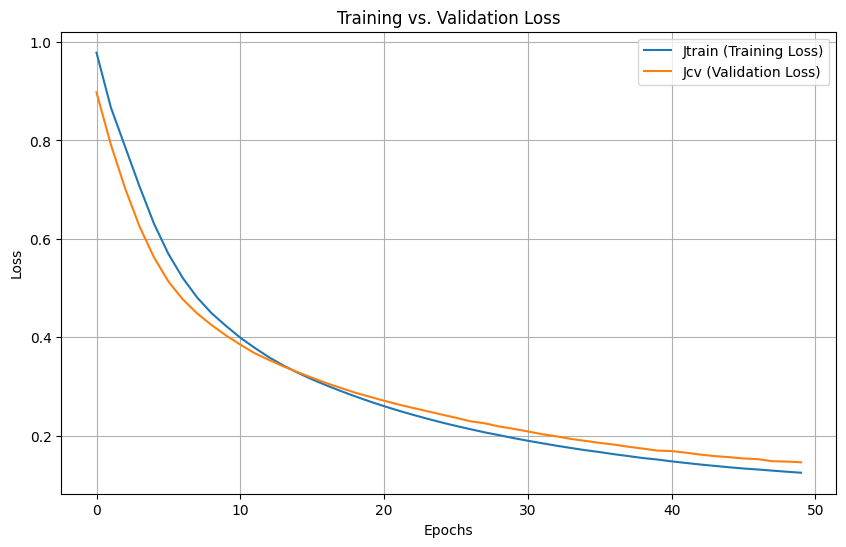

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Jtrain (Training Loss)')
plt.plot(history.history['val_loss'], label='Jcv (Validation Loss)')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

A test case for the model:

In [44]:
# Manually filled array with the provided data
new_sample = np.array([
    17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
    25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
])


new_sample = new_sample.reshape(1, -1)
prediction = model.predict(new_sample)
prediction_label = 1 if prediction >= 0.5 else 0
print(f"Prediction: {prediction[0][0]}")
print(f"Class Label: {'Malignant' if prediction_label == 1 else 'Benign'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: 1.0
Class Label: Malignant
